# Linear regression

In [2]:
import csv

import tensorflow as tf
import sys
from tensorflow import keras
from sklearn.preprocessing import scale
import numpy as np

print('opening file...')
with open('data/shapemap1000000.txt',"r") as f:
    myrange = 120000
    all_data=[next(f).split() for i in range(myrange)]

    # Creating input matrix
    myinputs = np.zeros((int(myrange/3)*20, 7))
    xcounter = 0
    for x in all_data[::3]:
        for y in range(0, 20):
            myinputs[xcounter][0] = y
            myinputs[xcounter][1:7] = [float(i) for i in x]
            xcounter += 1
    #myinputs = scale(myinputs, axis=0)

    coords = np.zeros((int(myrange/3)*20, 3))
    counter = 0
    for x in all_data[2::3]:
        for y in range(0, 20):
            coords[counter] = x[y * 3:(y + 1) * 3]
            counter += 1
    #coords = scale(coords, axis=0)
print('finished opening')

lastcoord = coords#[:,-3:] # get last three columns

def split_data(data, perc): # perc is the percentage value of where the data will split. ie: .8 or .2
  splitind = int(len(data)*perc)
  return data[:splitind], data[splitind:]

train_data, test_data = split_data(myinputs, 0.8)
train_labels, test_labels = split_data(lastcoord, 0.8)

print("Training set: {}".format(train_data.shape))  # xxx examples, 6 features
print("Testing set:  {}".format(test_data.shape))   # xxx examples, 6 features

opening file...
finished opening
Training set: (640000, 7)
Testing set:  (160000, 7)


# Training the model

In [5]:
train_dataR, cv_data = split_data(train_data, 0.8)
train_labelsR, cv_labels = split_data(train_labels, 0.8)
from sklearn.linear_model import LinearRegression

lin.fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

No handles with labels found to put in legend.


Optimal regularization parameter : 1e-05


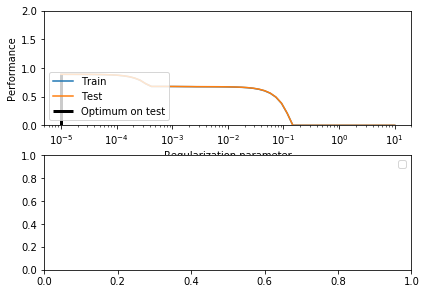

In [14]:
import numpy as np
from sklearn import linear_model

# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
reg = linear_model.Lasso(alpha=0.1)
train_errors = list()
cv_errors = list()
for alpha in alphas:
    reg.set_params(alpha=alpha)
    reg.fit(train_dataR,train_labelsR)
    train_errors.append(reg.score(train_dataR,train_labelsR))
    cv_errors.append(reg.score(cv_data, cv_labels))

i_alpha_optim = np.argmax(cv_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
reg.set_params(alpha=alpha_optim)
#coef_ = reg.fit(myinputs,lastcoord).coef_

# #############################################################################
# Plot results functions

import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, cv_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(cv_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
#plt.plot(coef, label='True coef')
#plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

In [27]:
reg = linear_model.Lasso(alpha=(1e-05))
reg.fit(train_dataR,train_labelsR)
trainYpre=reg.predict(train_dataR)
cvYpre=reg.predict(cv_data)
testYpre=reg.predict(test_data)

In [28]:
from sklearn import metrics

In [30]:
print("train error: ",metrics.mean_squared_error(train_labelsR,trainYpre))
print("cv error: ",metrics.mean_squared_error(cv_labels,cvYpre))
print("test error: ",metrics.mean_squared_error(test_labels,testYpre))

train error:  3.294345672626516e-05
cv error:  3.239641631780456e-05
test error:  3.29730603509431e-05


0.8880805565749019